In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
np.random.seed(seed=1)

In [3]:
def probability_hist(probs):
    """Create histogram of probabilities"""
    fig = plt.Figure()
    weights = np.ones_like(probs)/float(len(probs))
    plt.hist(probs, weights=weights)
    plt.xlim(0, 1)
    plt.ylim(0, 1);
    
def plot_roc_curve(fpr, tpr, roc_auc, lw=2):
    """Plot roc curve"""
    lw = lw
    fig = plt.Figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right");

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y>0,:2]
y = y[y>0] - 1

In [5]:
np.mean(y)

0.5

In [6]:
from sklearn import linear_model

lg = linear_model.LogisticRegression()
probability = lg.fit(X, y).predict_proba(X)[:, 1]

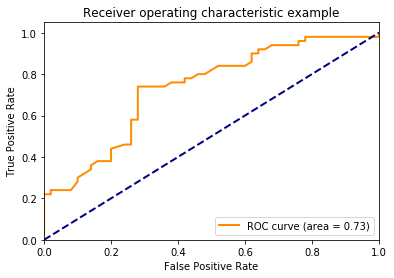

In [7]:
fpr, tpr, _ = roc_curve(y, probability)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc)

In [8]:
def probability_histogram_class(probability, y):
    plt.subplot(221)
    counts, bins, _ = plt.hist([probability[y==0], probability[y==1]], stacked=True)
    plt.xlim(np.min(bins),np.max(bins))
    plt.xticks([])
    
    plt.subplot(222)
    plt.hist(probability[y==1], cumulative=-1, normed=True, color='tab:orange')
    plt.xlim(np.min(bins),np.max(bins))
    plt.xticks([])
    plt.ylim(0,1)
    
    plt.subplot(224)
    plt.hist(probability[y==0], cumulative=-1, normed=True, color='tab:blue')
    plt.xlim(np.min(bins),np.max(bins))
    plt.xticks()
    plt.ylim(0,1)
    
    plt.subplot(223)
    proportion = counts[0]/[max(0.0001, x) for x in counts[1]]
    plt.plot(bins[:-1], 1-proportion)
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(0,1);

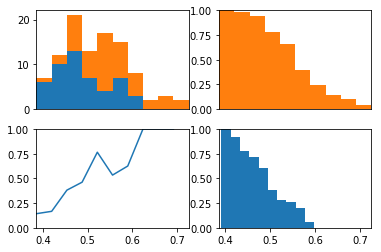

In [9]:
probability_histogram_class(probability, y)

Now let's look at this data but this time with unbalanced classes.

In [10]:
X = iris.data
y = iris.target

X = X[:, :2]
y = np.array([min(1,i) for i in y])

In [11]:
len(y)

150

In [12]:
np.mean(y)

0.66666666666666663

In [13]:
probability = lg.fit(X, y).predict_proba(X)[:, 1]

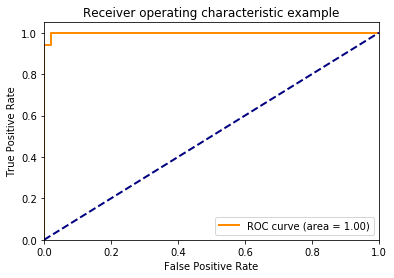

In [14]:
fpr, tpr, _ = roc_curve(y, probability)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc)

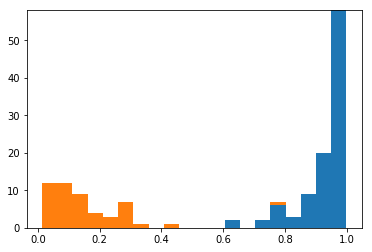

In [15]:
counts, _, _ = plt.hist([probability[y==1], probability[y==0]], bins=20, stacked=True)

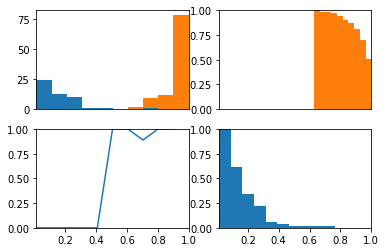

In [16]:
probability_histogram_class(probability, y)

In [17]:
from sklearn.utils import shuffle

X = shuffle(X)
probability = lg.fit(X, y).predict_proba(X)[:, 1]

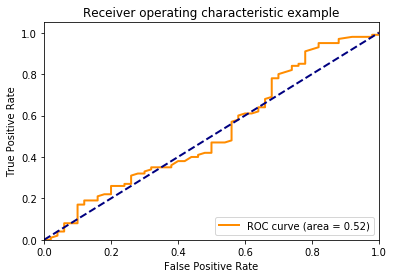

In [18]:
fpr, tpr, _ = roc_curve(y, probability)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc)

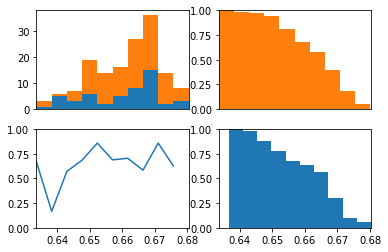

In [19]:
probability_histogram_class(probability, y)

Beautiful! Again, the positive class appears uniformly throughout the probabilities prevents the model from finding pockets of the positive class.

In [20]:
%load_ext watermark
%watermark -v -m -p numpy,matplotlib,sklearn

CPython 3.6.3
IPython 6.1.0

numpy 1.13.3
matplotlib 2.0.2
sklearn 0.19.1

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-36-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
